In [71]:
import numpy as np
from math import pi
from gdshelpers.geometry.chip import Cell
from gdshelpers.parts.waveguide import Waveguide
from gdshelpers.parts.coupler import GratingCoupler
from gdshelpers.parts.resonator import RingResonator
from gdshelpers.parts.splitter import Splitter
from gdshelpers.layout import GridLayout
from gdshelpers.parts.marker import CrossMarker
from gdshelpers.parts.marker import SquareMarker
from gdshelpers.helpers.positive_resist import convert_to_positive_resist
from gdshelpers.parts.port import Port
from shapely.geometry import Polygon
from shapely.affinity import scale
from shapely.affinity import translate
from shapely.affinity import rotate
from gdshelpers.geometry import geometric_union
from gdshelpers.helpers.under_etching import create_holes_for_under_etching
from gdshelpers.geometry.ebl_frame_generators import raith_marker_frame
from gdshelpers.parts.text import Text
from shapely.geometry import Point
import importlib
import aco_components
importlib.reload(aco_components)

<module 'aco_components' from '/Users/haoqindeng/Desktop/Qtransduction/IDT_gds/aco_components.py'>

i:  0
prop_len:  -200
x_off:  0
shift 2:  79.11111111111111
debug shift:  0 79.11111111111111 7.911111111111111
specifically debug arm1-2:  [(-71.2, 17.5), (-71.2, 12.5), (97.02222222222223, 12.5), (97.02222222222223, 17.5)]
pad coordinates:  83.02222222222223 385.02222222222224 120 120 345.02222222222224 4.5 83.02222222222223 4.5
[(-378.8, -8), (-378.8, -3), (-537.0222222222222, -3), (-537.0222222222222, -8)]
[(-378.8, 17.5), (-378.8, 12.5), (-537.0222222222222, 12.5), (-537.0222222222222, 17.5)]
[(-71.2, -8), (-71.2, -3), (97.02222222222223, -3), (97.02222222222223, -8)]
[(-71.2, 17.5), (-71.2, 12.5), (97.02222222222223, 12.5), (97.02222222222223, 17.5)]
outer corner coordinates:  [(83.02222222222223, 120), (385.02222222222224, 120), (385.02222222222224, -216.5), (55.02222222222224, -216.5), (55.02222222222224, -75.5), (345.02222222222224, -75.5), (345.02222222222224, 4.5), (83.02222222222223, 4.5)]
i:  1
prop_len:  50
x_off:  1350
shift 2:  79.11111111111111
debug shift:  0 79.11111

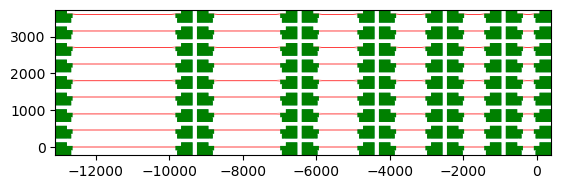

In [77]:
x_space = 100
y_space = 100
prop_len_init = -200
prop_len_stepsize = [250, 250, 250, 250, 750, 1000]
wg_widths = [20, 17.5, 15, 12.5, 10, 7.5, 5, 2.5, 1.2]
# wg_widths = [15, 1.2]
x_device_num = 6
y_device_num = 1

cell = Cell('IDT_test2')
x_off = 0
for k in range(len(wg_widths)):
    wg_width = wg_widths[k]
    for j in range(y_device_num):
        y_off = (y_space + 350) * k
        for i in range(x_device_num):
            if i == 0:
                x_off = 0
                prop_len = prop_len_init
            else:
                x_off = x_off + prop_len + 1450 + x_space

                prop_len = prop_len + prop_len_stepsize[i]

            print('i: ', i)
            print('prop_len: ', prop_len)
            print('x_off: ', x_off)
            translation_offset = [-x_off, y_off]
            
            IDT_straight_delayline = aco_components.make_IDT_stright_delayline(cell, prop_len=prop_len, wg_width=wg_width, translation_offset=translation_offset, number_of_pairs=95, IDT_Aperature=15, guided=True)
IDT_straight_delayline.show()
IDT_straight_delayline.save('IDT_library_GDS/IDT_straight_DL_SAW')

In [8]:
x_space = 100
y_space = 100
prop_len_init = 0
prop_len_stepsize = 200
x_device_num = 5
y_device_num = 3

cell = Cell('IDT_test2')
x_off = 0
for j in range(y_device_num):
    y_off = (y_space + 250) * j
    for i in range(x_device_num):
        if i == 0:
            x_off = 0
            prop_len = prop_len_init
        else:
            x_off = x_off + prop_len + 1450 + x_space
            prop_len = prop_len + prop_len_stepsize

        print('i: ', i)
        print('prop_len: ', prop_len)
        print('x_off: ', x_off)
        translation_offset = [-x_off, y_off]
        
        IDT_straight_delayline = aco_components.make_IDT_stright_delayline(cell, prop_len=prop_len, wg_width=1.2, translation_offset=translation_offset, guided=False)

IDT_straight_delayline.save('IDT_library_GDS/IDT_straight_DL_SAW')

i:  0
prop_len:  0
x_off:  0
[(-563.6, -8), (-563.6, -3), (-755.6, -3), (-755.6, -8)]
[(-563.6, 17.5), (-563.6, 12.5), (-755.6, 12.5), (-755.6, 17.5)]
[(-86.4, -8), (-86.4, -3), (105.6, -3), (105.6, -8)]
[(-86.4, 17.5), (-86.4, 12.5), (105.6, 12.5), (105.6, 17.5)]
i:  1
prop_len:  200
x_off:  1550
[(-763.6, -8), (-763.6, -3), (-955.6, -3), (-955.6, -8)]
[(-763.6, 17.5), (-763.6, 12.5), (-955.6, 12.5), (-955.6, 17.5)]
[(-86.4, -8), (-86.4, -3), (105.6, -3), (105.6, -8)]
[(-86.4, 17.5), (-86.4, 12.5), (105.6, 12.5), (105.6, 17.5)]
i:  2
prop_len:  400
x_off:  3300
[(-963.6, -8), (-963.6, -3), (-1155.6, -3), (-1155.6, -8)]
[(-963.6, 17.5), (-963.6, 12.5), (-1155.6, 12.5), (-1155.6, 17.5)]
[(-86.4, -8), (-86.4, -3), (105.6, -3), (105.6, -8)]
[(-86.4, 17.5), (-86.4, 12.5), (105.6, 12.5), (105.6, 17.5)]
i:  3
prop_len:  600
x_off:  5250
[(-1163.6, -8), (-1163.6, -3), (-1355.6, -3), (-1355.6, -8)]
[(-1163.6, 17.5), (-1163.6, 12.5), (-1355.6, 12.5), (-1355.6, 17.5)]
[(-86.4, -8), (-86.4, -3), 

/opt/miniconda3/envs/torch/lib/python3.9/site-packages/gdshelpers/geometry/shapely_adapter.py:116: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  poly._gdsh_n_points = len(poly.exterior.coords) + sum([len(shapely.geometry.LinearRing(x).coords) for x
